# HOUSING: PRICE PREDICTION

Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house

Business Goal:
    
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


Technical Requirements:
    
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.


In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
data=pd.read_csv('train.csv')  # read the data
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print("-"*60)
print(data.isna().sum())
#printing the summary of data type
data.info() 

(1168, 81)
------------------------------------------------------------
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   o

As we see there are null values are present in the train dataset.

In [4]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(1168, 81)


No duplicates are found so lets move further.

In [5]:
# Lest drop the irrelavent columns first 
data=data.drop(columns='Id', axis=1)

print(data.shape)

(1168, 80)


# Statistical Summary

In [6]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168,954.00000,1168.000000,1168,77,1168,1168,1168,1168,...,1168.000000,7,237,44,1168.000000,1168.000000,1168.000000,1168,1168,1168.000000
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,928,NaN,NaN,1164,41,740,1046,1168,842,...,NaN,3,129,40,NaN,NaN,NaN,999,945,NaN
mean,56.767979,NaN,70.98847,10484.749144,NaN,NaN,NaN,NaN,NaN,NaN,...,3.448630,NaN,NaN,NaN,47.315068,6.344178,2007.804795,NaN,NaN,181477.005993
std,41.940650,NaN,24.82875,8957.442311,NaN,NaN,NaN,NaN,NaN,NaN,...,44.896939,NaN,NaN,NaN,543.264432,2.686352,1.329738,NaN,NaN,79105.586863
min,20.000000,NaN,21.00000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,60.00000,7621.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,130375.000000
50%,50.000000,NaN,70.00000,9522.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163995.000000
75%,70.000000,NaN,80.00000,11515.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,215000.000000


Observations: 1) null vallues are present 2)we have categorical data type(object type) 3)outliers are present in the dataset 4)in some columns thre is too much diffrance between mean and std. deviation

# EDA

# Data Visualization

# Univariate Plots

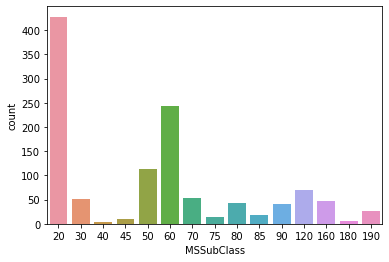

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


In [7]:
#plot each class frequency
sns.countplot(x='MSSubClass',data=data)
plt.show()
print(data['MSSubClass'].value_counts())

From graph we cansee the type 20 MSSubClass of dwelling involved in the sale is more than the other and that is 428. The least MSSubClass of dwelling involved in the sale is 40 almost 3.

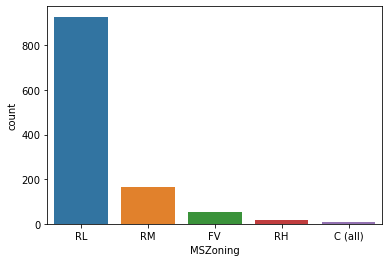

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


In [8]:
#plot each class frequency
sns.countplot(x='MSZoning',data=data)
plt.show()
print(data['MSZoning'].value_counts())

Residential Low Density is the most important general zoning classification of the sale than the others.

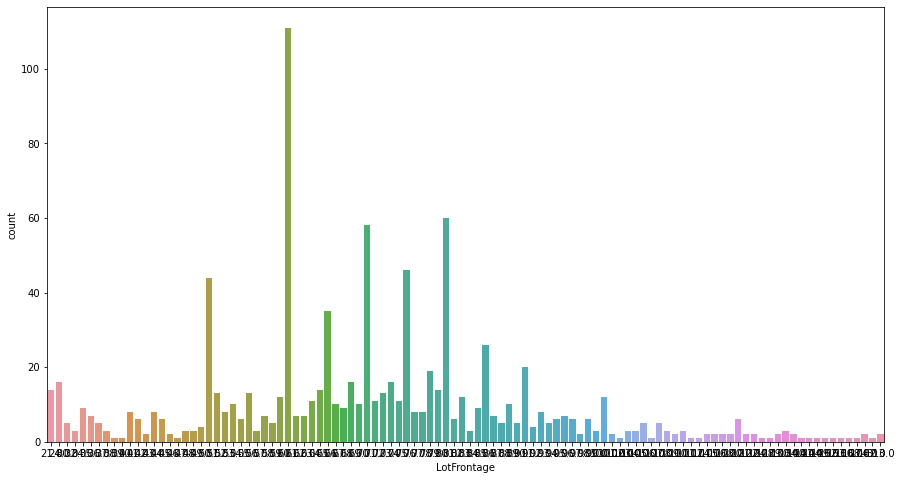

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64


In [9]:
#plot each class frequency
plt.figure(figsize=(15,8))
sns.countplot(x='LotFrontage',data=data)
plt.show()
print(data['LotFrontage'].value_counts())

The  maximum 60 Linear feet of street connected to property.

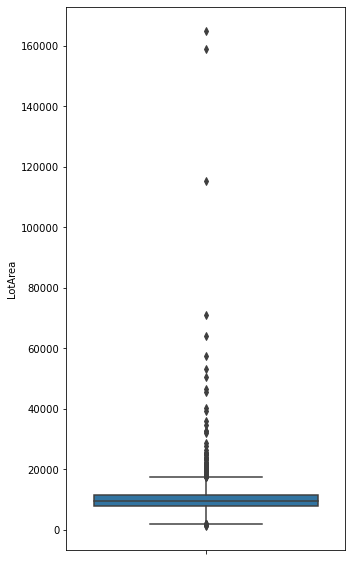

9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64


In [10]:
#plot each class frequency
plt.figure(figsize=(5,10))
sns.boxplot(y='LotArea',data=data)
plt.show()
print(data['LotArea'].value_counts())

From graph we can see the 9600 is the maximum Lot size in square feet. Also the outliers are present in this predictor.

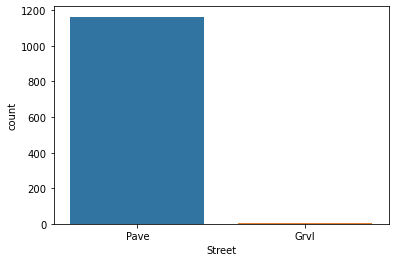

Pave    1164
Grvl       4
Name: Street, dtype: int64


In [11]:
#plot each class frequency
sns.countplot(x='Street',data=data)
plt.show()
print(data['Street'].value_counts())

We can see the more Pave type of road properties are there to access the property.

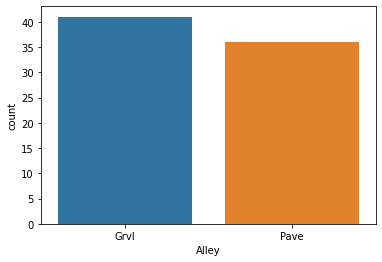

Grvl    41
Pave    36
Name: Alley, dtype: int64


In [12]:
#plot each class frequency
sns.countplot(x='Alley',data=data)
plt.show()
print(data['Alley'].value_counts())

Both the type of properties has alley access to property.

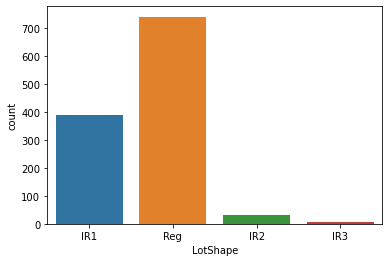

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


In [13]:
#plot each class frequency
sns.countplot(x='LotShape',data=data)
plt.show()
print(data['LotShape'].value_counts())

The maximum General shape of property is Regular then IR1 and the least shape of properties is IR3.

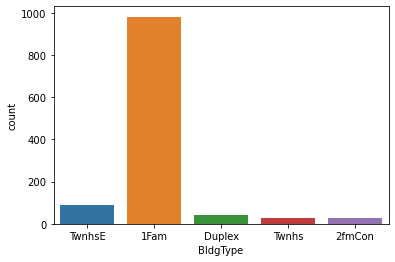

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


In [14]:
#plot each class frequency
sns.countplot(x='BldgType',data=data)
plt.show()
print(data['BldgType'].value_counts())

From graph we can see that the maximum Type of dwelling in property is Single-family Detached

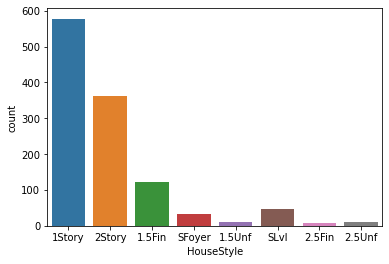

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


In [15]:
#plot each class frequency
sns.countplot(x='HouseStyle',data=data)
plt.show()
print(data['HouseStyle'].value_counts())

The more Style of dwelling preferd is 1story that is One story

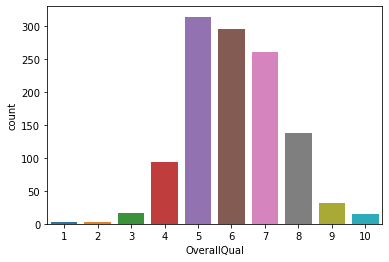

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


In [16]:
#plot each class frequency
sns.countplot(x='OverallQual',data=data)
plt.show()
print(data['OverallQual'].value_counts())

Rates the overall material and finish of the house are given  in as Average, Above Average, Good then Very Good. A very less cutomer has given 10 Very Excellent.

# Bivariate Plot

<Figure size 720x432 with 0 Axes>

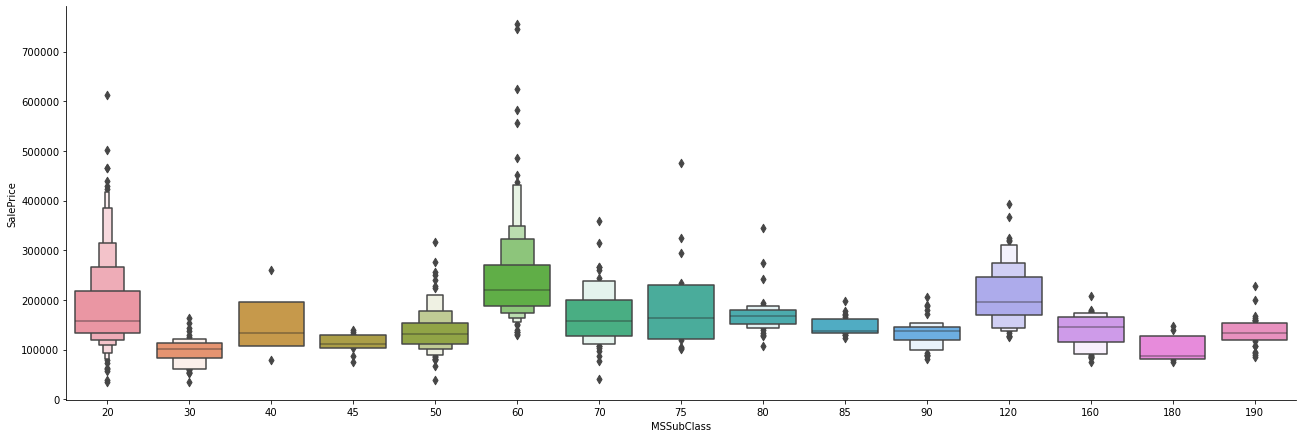

In [17]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='MSSubClass', y ='SalePrice', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

the maximum 2-STORY 1946 & NEWER the type of dwelling involved in the sale

<Figure size 720x432 with 0 Axes>

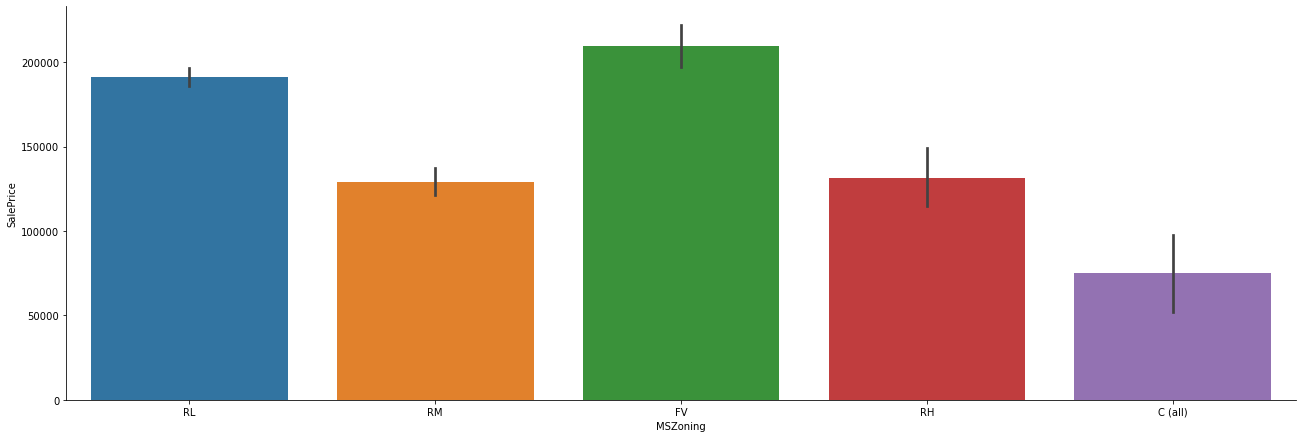

In [18]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='MSZoning', y ='SalePrice', data = data, kind = "bar", height = 6, aspect = 3)
plt.show()

The maximum sale price is for the Floating Village Residential and Residential Low Density

<Figure size 432x432 with 0 Axes>

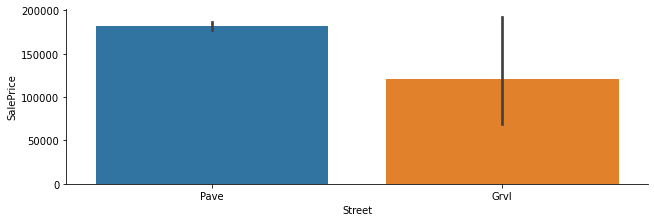

In [19]:
#Bivariant graph
plt.figure(figsize =(6, 6))
sns.catplot(x ='Street', y ='SalePrice', data = data, kind = "bar", height = 3, aspect = 3)
plt.show()

The sale price for the Pave type property is more than the Grvel.

<Figure size 720x432 with 0 Axes>

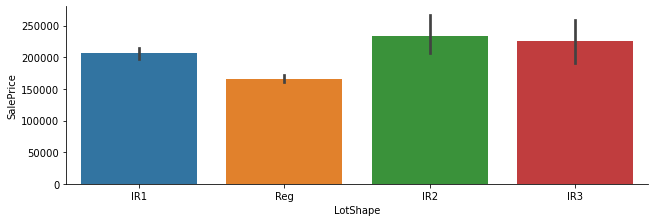

In [20]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='LotShape', y ='SalePrice', data = data, kind = "bar", height =3, aspect = 3)
plt.show()

The sale price is more for the Moderately Irregular type of property.

<Figure size 720x432 with 0 Axes>

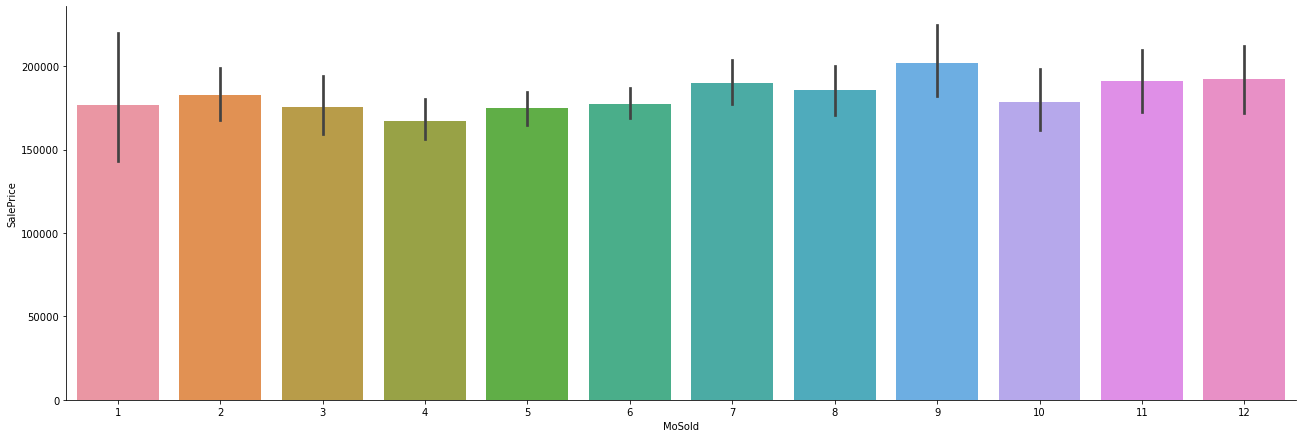

In [21]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='MoSold', y ='SalePrice', data = data, kind = "bar", height = 6, aspect = 3)
plt.show()

In the almost every month the propery was sale.

<Figure size 720x432 with 0 Axes>

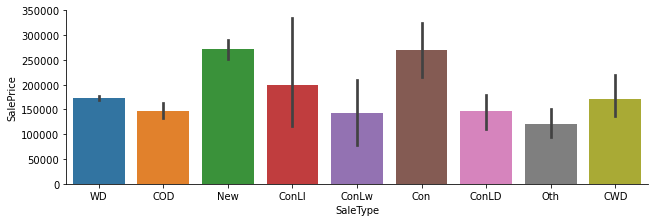

In [22]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='SaleType', y ='SalePrice', data = data, kind = "bar", height = 3, aspect = 3)
plt.show()

The maximum type of sale property is Home just constructed and sold & Contract 15% Down payment regular terms.

<Figure size 720x432 with 0 Axes>

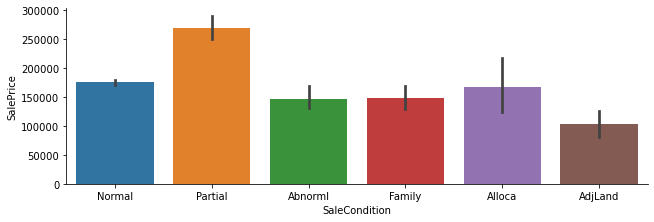

In [23]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='SaleCondition', y ='SalePrice', data = data, kind = "bar", height = 3, aspect = 3)
plt.show()

 From graph the maximum Condition of sale is Partial	Home was not completed when last assessed (associated with New Homes)

# Multivarieant plot

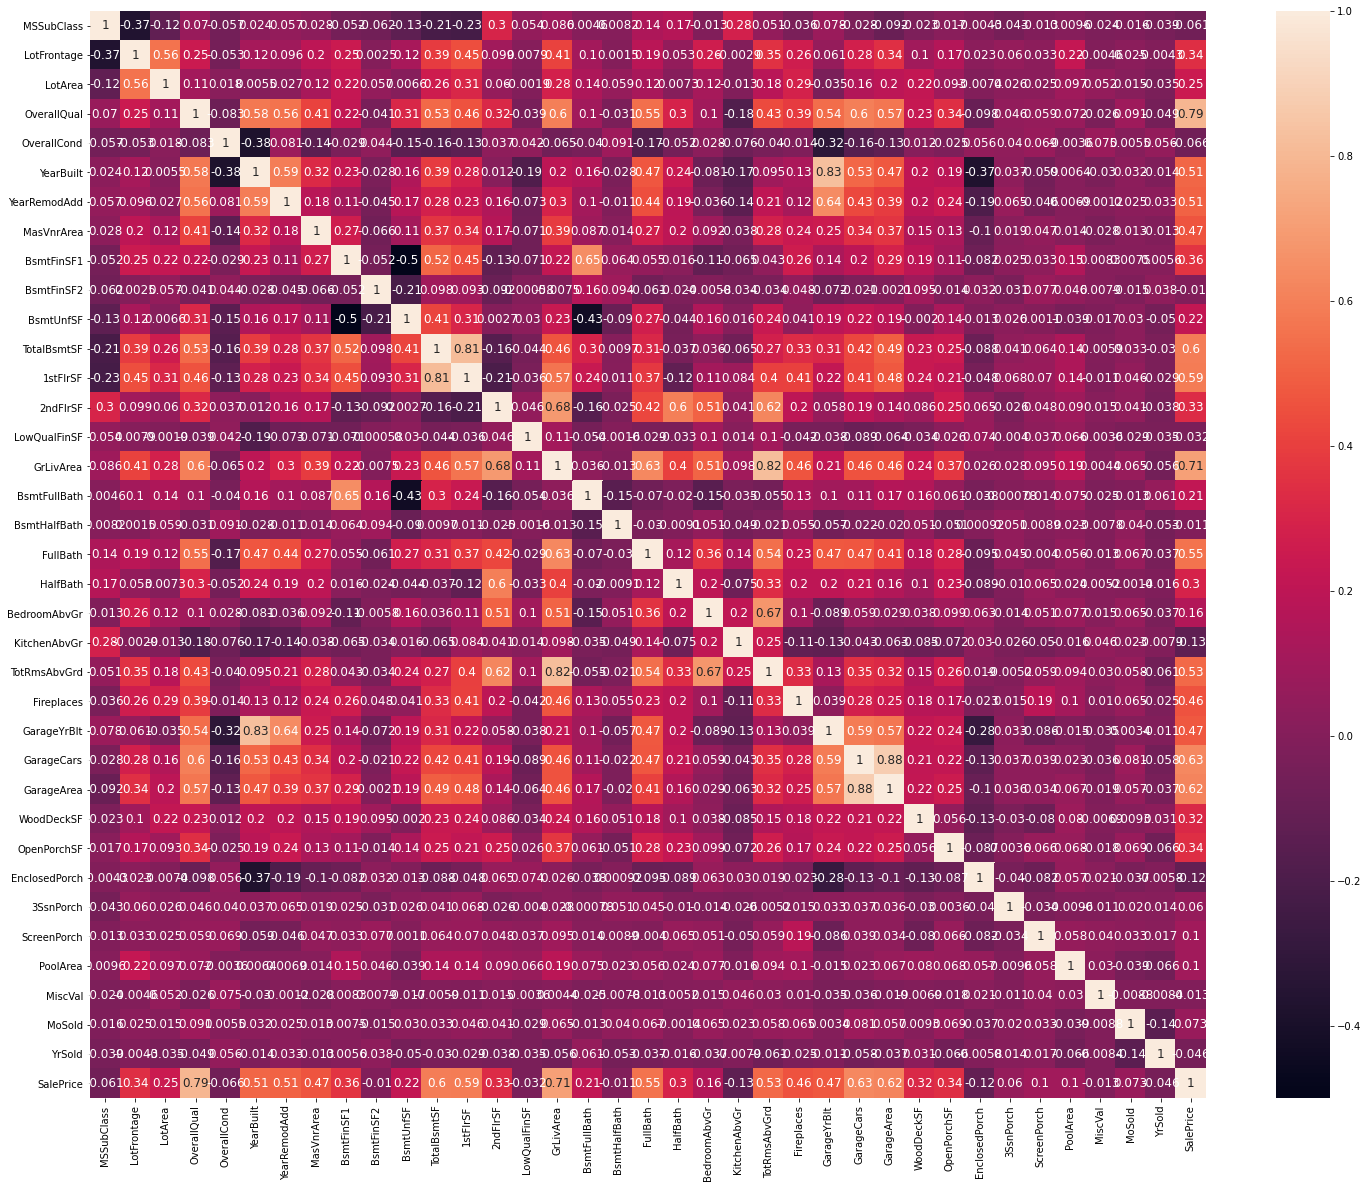

In [25]:
#check multicolinearity
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12})
plt.show()

From above graph we can see that the relation with evry independet variable with target variable(positive) also in other independant variables. also we can see there are some colinarity present in some column. Further we will deal with it by using VIF.

# Data preprocessing

As our dataset has the null value lets deal with it.

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


In [26]:
# As per the information in data description file the NA in the column Alley is No Alley Access so lets replace all NA with No alley access
data['Alley']=data['Alley'].replace("NA","No alley access")
data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].replace("NA","No Basement")
data['FireplaceQu']=data['FireplaceQu'].replace("NA","No Fireplace")
data['PoolQC']=data['PoolQC'].replace("NA","No Pool")
data['Fence']=data['Fence'].replace("NA","No Fence")
data[['GarageCond','GarageQual','GarageFinish','GarageType']]=data[['GarageCond','GarageQual','GarageFinish','GarageType']].replace("NA","No Garage")

In [27]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    df=label.fit_transform(data[i])
    pd.Series(df)
    data[i]=df

As we have other null values also in the data set so lets deal with it by using Imputer tech.

In [29]:
# Creating null value list which we want to impute by using iterative inputer
df=data[['LotFrontage','MasVnrArea','GarageYrBlt','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]

Iterative Imputer

Iterative imputer is a hidden gem of the sklearn library in python. The iterative imputer library provides us with tools to tackle the problem mentioned above. Instead of just replacing values with mean/median, we can have a regressor (Linear/Decision Tree/Random Forest/KNN) to impute missing values. By using the iterative imputer we can intelligently impute the missing values, avoid bias, maintain the relationship between variables, and can get better results.

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

for i in df:
    df1=imputer.fit_transform(data[[i]])
    pd.Series([df1])
    data[i]=df1

In [31]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.98847,4928,1.0,2.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,4.0,0,2,2007,8.0,4.0,128000
1,20,3.0,95.00000,15865,1.0,2.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,4.0,0,10,2007,8.0,4.0,268000
2,60,3.0,92.00000,9920,1.0,2.0,0.0,3.0,0.0,1.0,...,0,3.0,4.0,4.0,0,6,2007,8.0,4.0,269790
3,20,3.0,105.00000,11751,1.0,2.0,0.0,3.0,0.0,4.0,...,0,3.0,2.0,4.0,0,1,2010,0.0,4.0,190000
4,20,3.0,70.98847,16635,1.0,2.0,0.0,3.0,0.0,2.0,...,0,3.0,4.0,4.0,0,6,2009,8.0,4.0,215000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   float64
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   float64
 5   Alley          1168 non-null   float64
 6   LotShape       1168 non-null   float64
 7   LandContour    1168 non-null   float64
 8   Utilities      1168 non-null   float64
 9   LotConfig      1168 non-null   float64
 10  LandSlope      1168 non-null   float64
 11  Neighborhood   1168 non-null   float64
 12  Condition1     1168 non-null   float64
 13  Condition2     1168 non-null   float64
 14  BldgType       1168 non-null   float64
 15  HouseStyle     1168 non-null   float64
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

As null values are treated well

In [33]:
# See again Statistical Summary
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,3.013699,70.988470,10484.749144,0.996575,1.898973,1.938356,2.773973,0.0,3.004281,...,3.448630,2.988870,3.475171,3.921233,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,41.940650,0.633120,22.437056,8957.442311,0.058445,0.401453,1.412262,0.710027,0.0,1.642667,...,44.896939,0.157245,1.112090,0.408514,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7621.500000,1.000000,2.000000,0.000000,3.000000,0.0,2.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,50.000000,3.000000,70.988470,9522.500000,1.000000,2.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,70.000000,3.000000,79.250000,11515.500000,1.000000,2.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,190.000000,4.000000,313.000000,164660.000000,1.000000,2.000000,3.000000,3.000000,0.0,4.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


All null values are treated well now lets move further for the skewness & colinarity

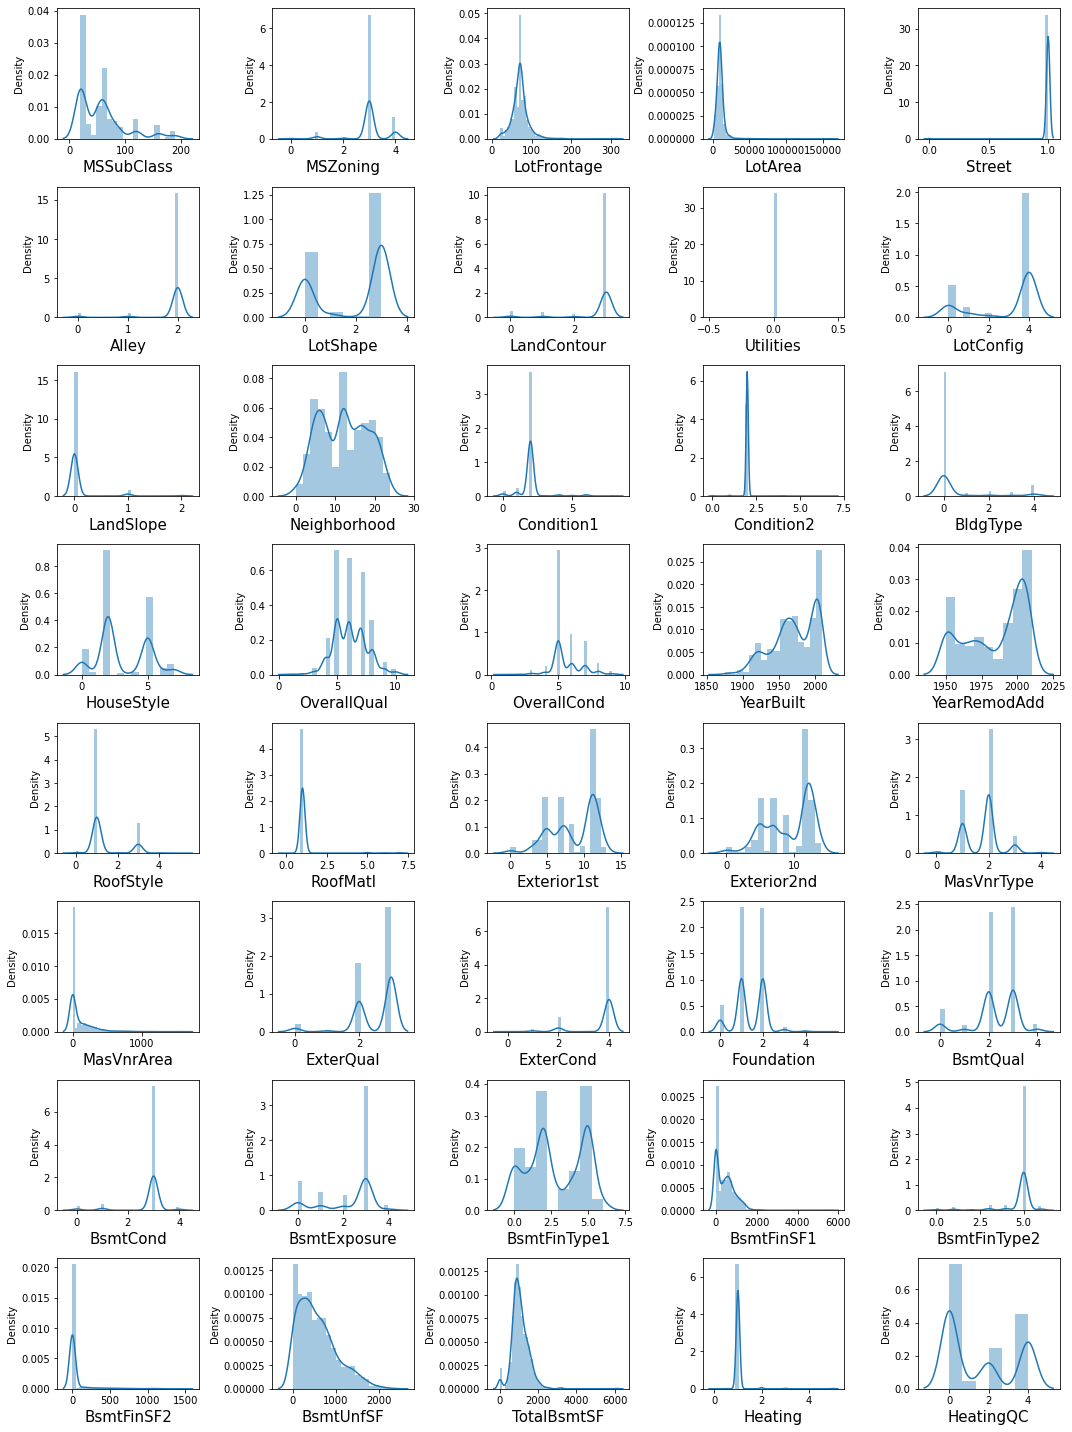

In [34]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From graph we can see there are skewness is present in almost all the columns so lets check with .skew() method

In [35]:
data.skew(axis=0)

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 80, dtype: float64

In [36]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

As we see the skewed data is present as per thumb rule +0.5/-0.5 weight lets work on right skewed data by using power transform

In [37]:
# Separate the skewed columns
df1=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'SaleType', 'SaleCondition', 'SalePrice']

# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)

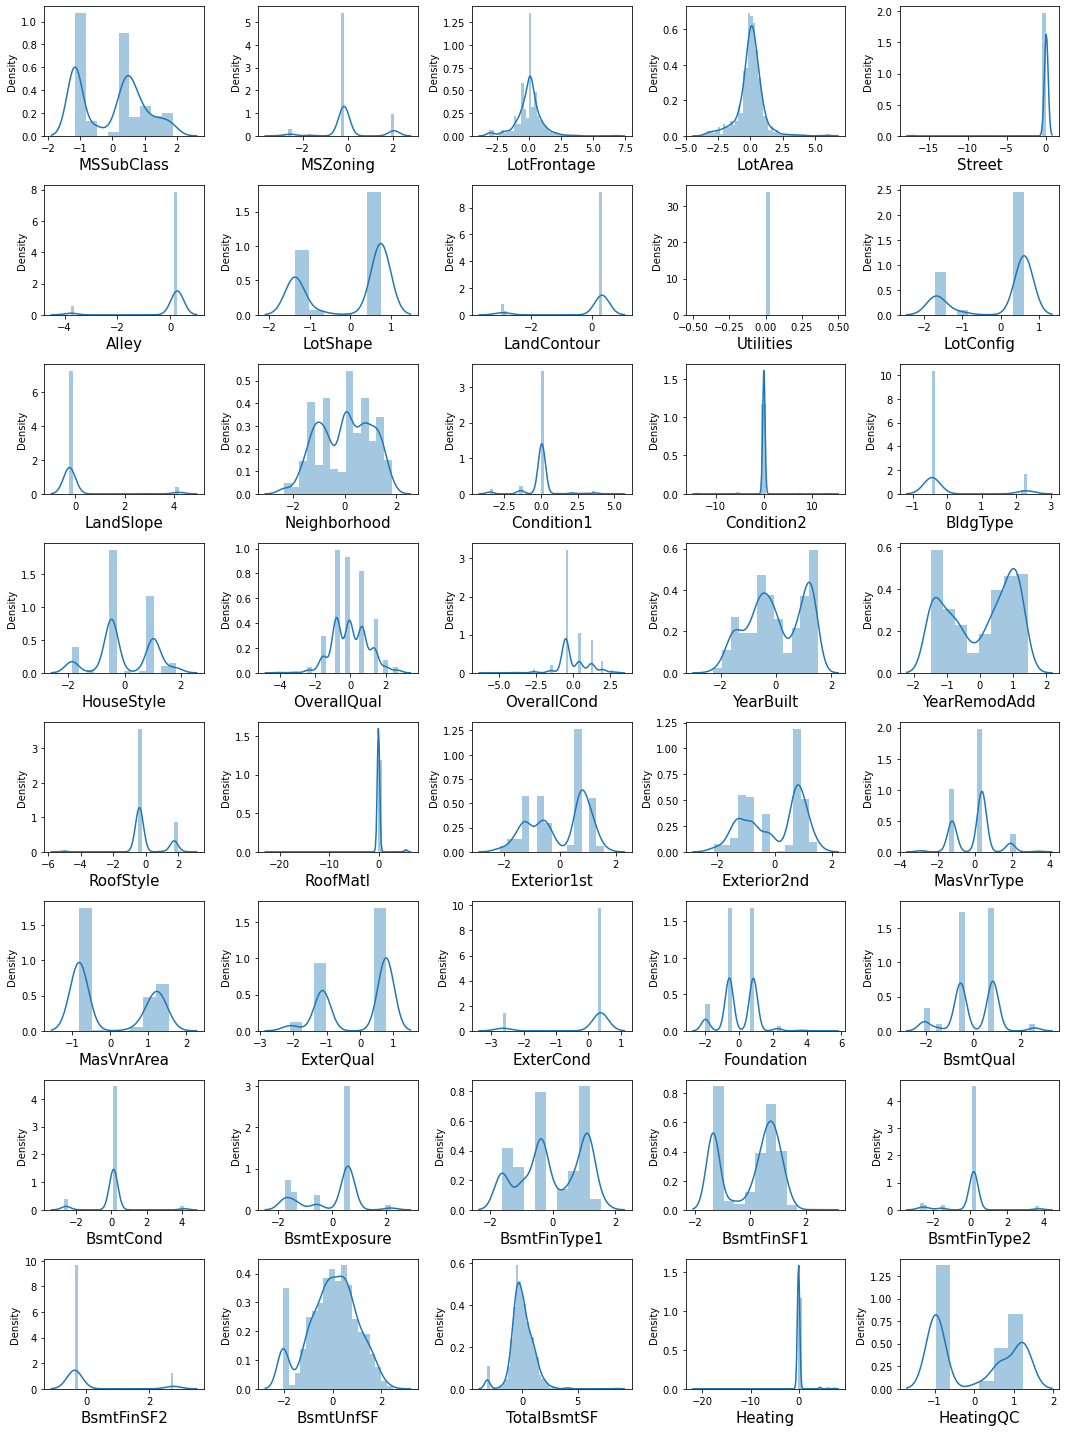

In [38]:
# Distribution or Graphical analysis after Power transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now we handaled skewed data lets check the outliers between label and predictors

In [39]:
data.shape

(1168, 80)

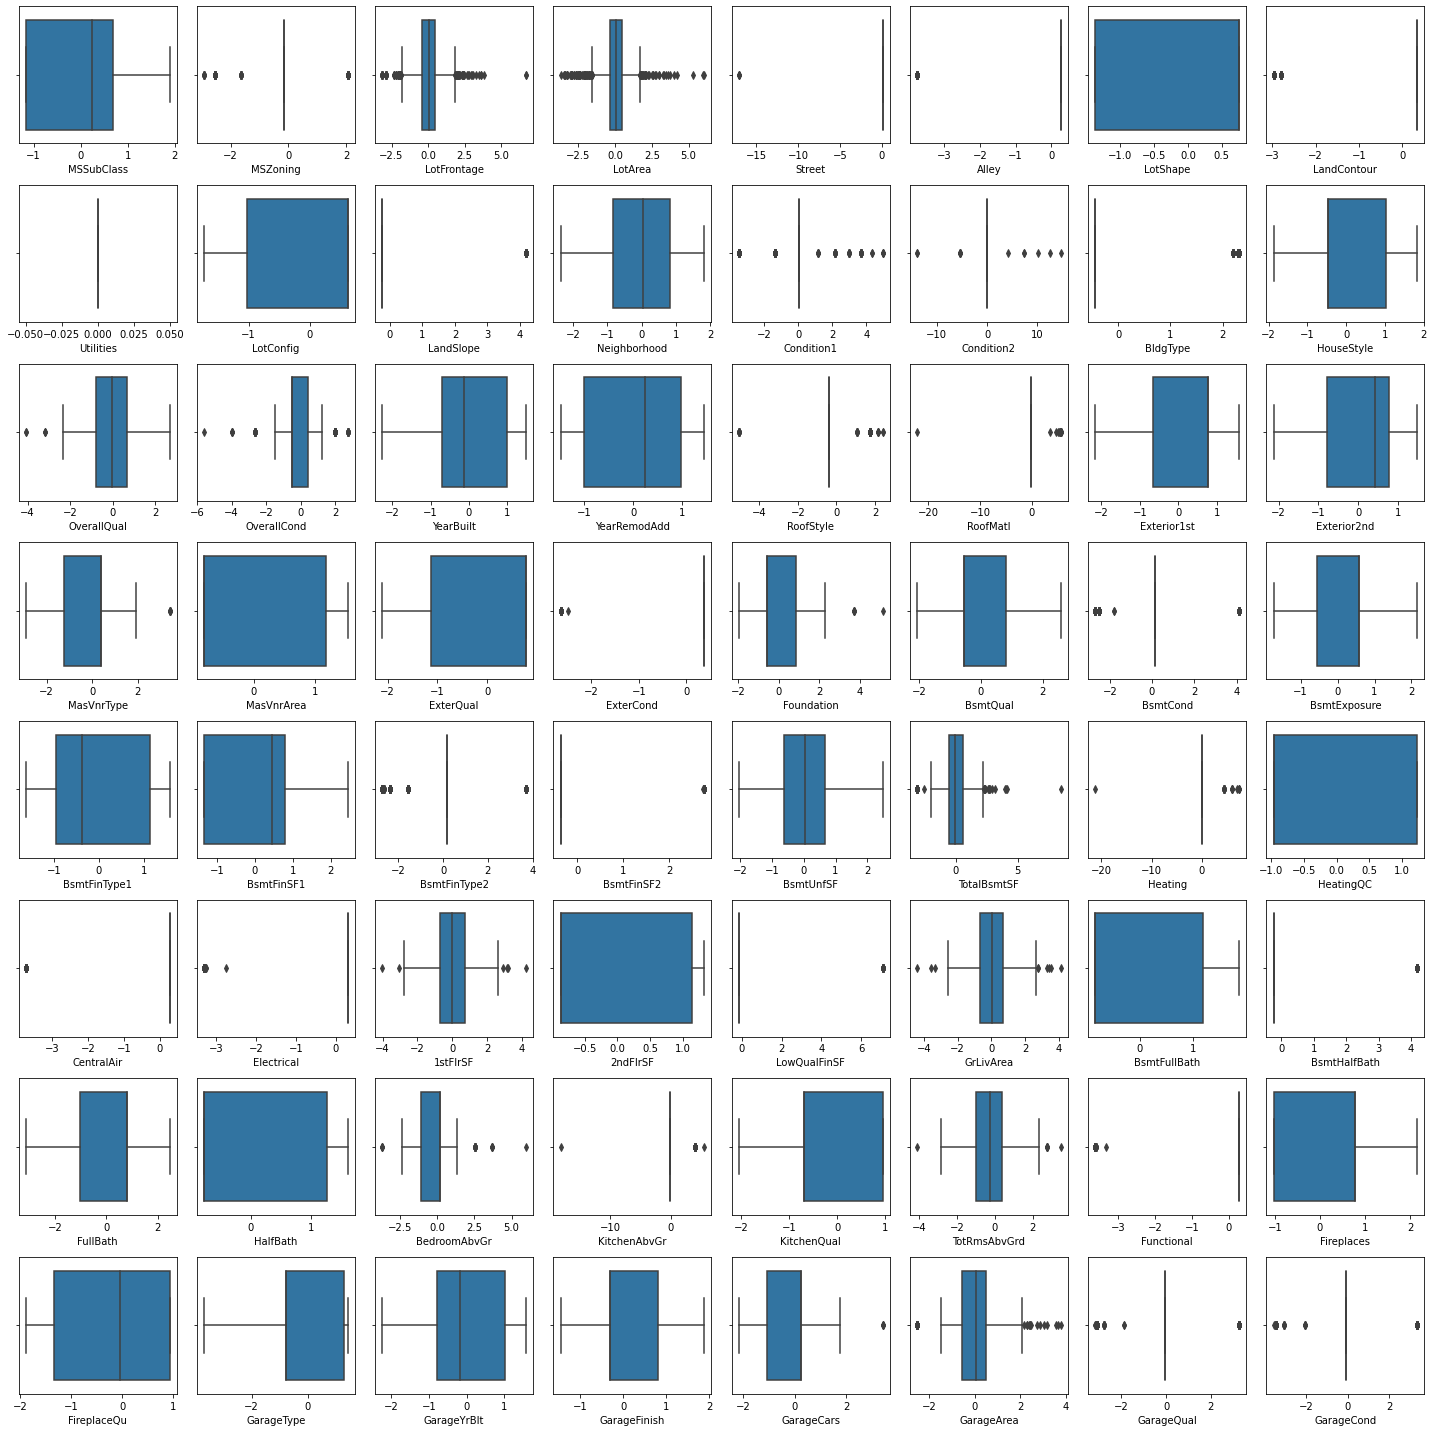

In [40]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=64:
        ax=plt.subplot(8,8,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From graph we can see the outliers are present columns so lets deal with it by using Zscore

In [41]:
# Separate the outliers columns
df1=['MSZoning', 'LotFrontage', 'LotArea','LandContour', 'LandSlope','Condition1', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'MasVnrType','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF','GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Functional','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'SaleType', 'SaleCondition', 'SalePrice']

In [42]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(data[df1])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [43]:
data.shape

(619, 80)

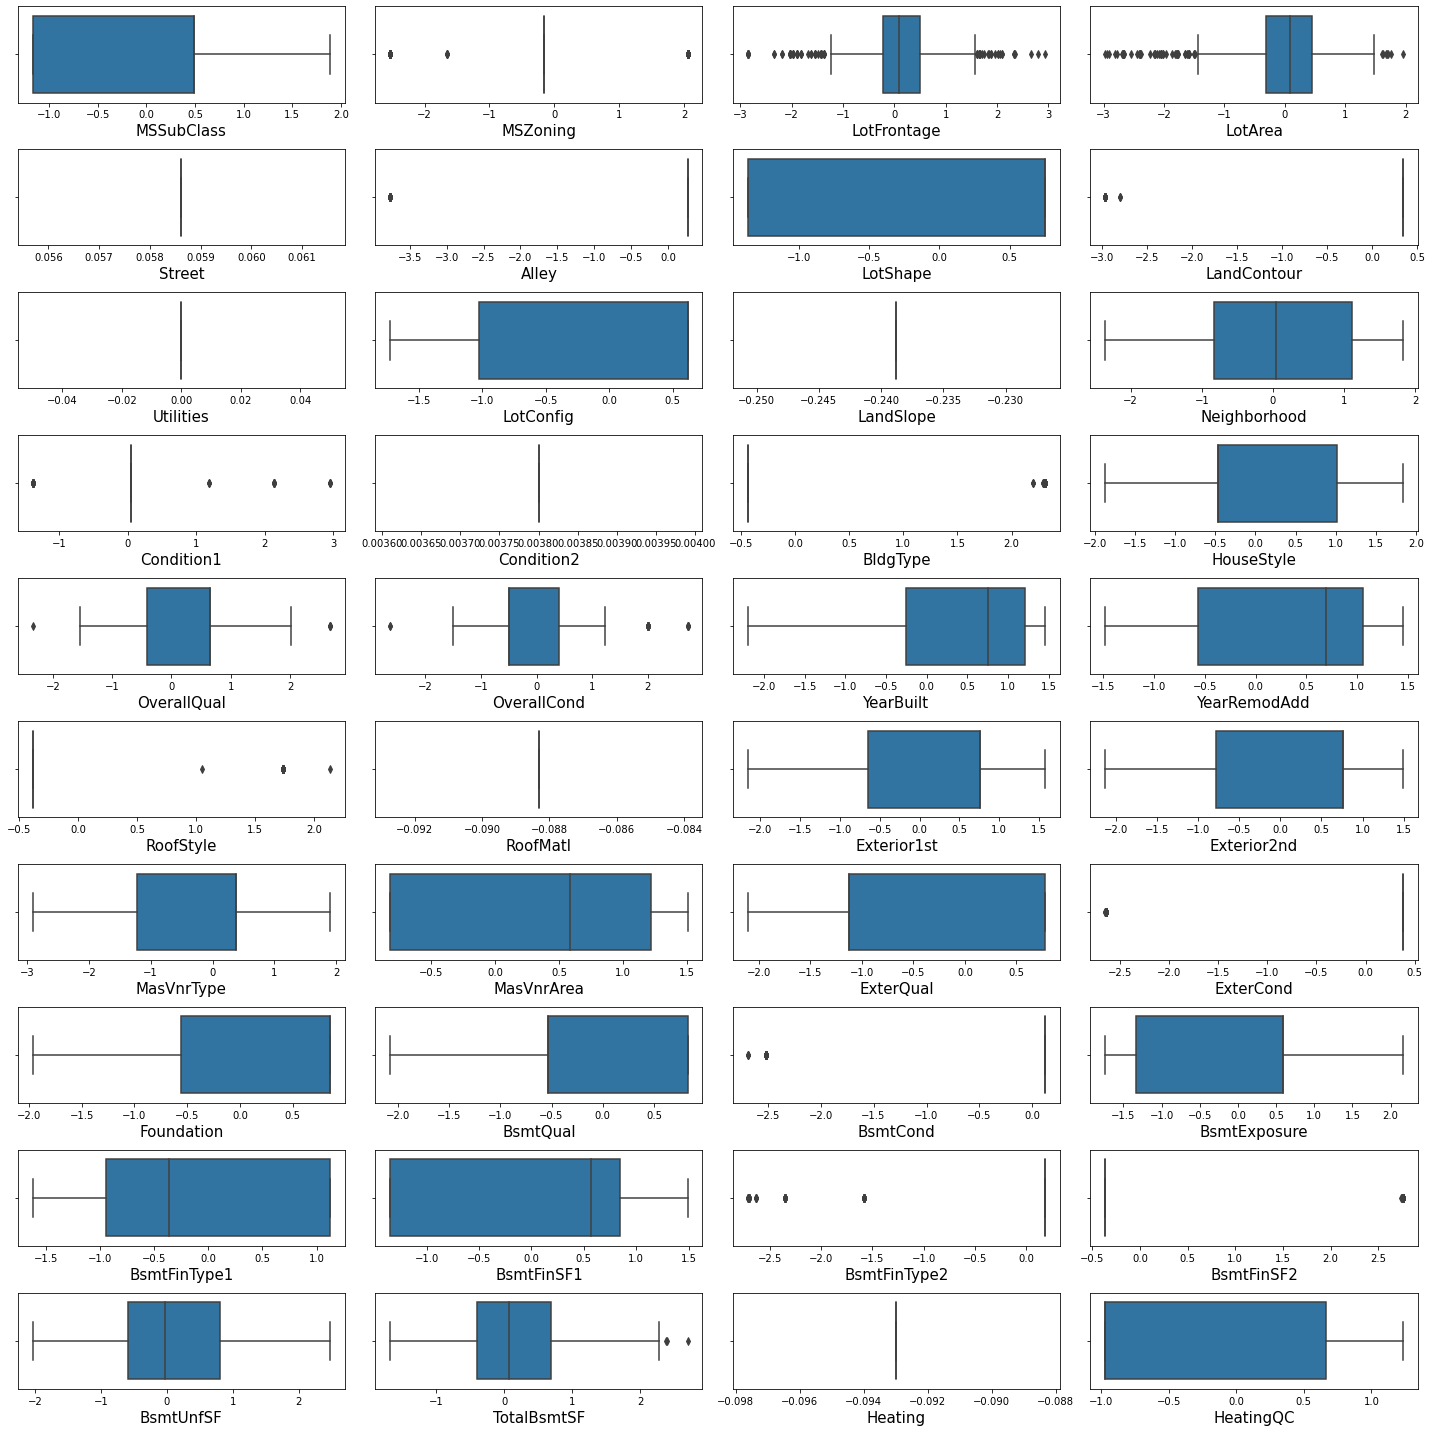

In [44]:
#Let's see plot after removing outliers
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now we handaled outliers data lets check the colinarity between label and predictors

In [45]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['SalePrice'])
y=data['SalePrice']

In [46]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [47]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

         vif        featurs
0   9.456248     MSSubClass
1   1.725692       MSZoning
2   2.268559    LotFrontage
3   3.527018        LotArea
4   0.000000         Street
..       ...            ...
74       NaN        MiscVal
75  1.142510         MoSold
76  1.202151         YrSold
77  1.665228       SaleType
78  1.829983  SaleCondition

[79 rows x 2 columns]


In [48]:
# Lets make thumb rule we can drop the columns if VIF values are more than the 10 pvalue
index=np.where(vif['vif']>10)
vif.loc[index]

,vif,featurs
18,16.825635,YearBuilt
34,28.202149,BsmtFinType2
35,29.100187,BsmtFinSF2
37,10.831835,TotalBsmtSF
42,20.155439,1stFlrSF
43,26.117573,2ndFlrSF
45,27.504631,GrLivArea
58,10.631115,GarageYrBlt


As we see the pvalues of above predictors is more than 10 so lets drop the same & reduce the colinarity.

In [50]:
# Let's Seperate the data again 
x=data.drop(columns=['SalePrice','BsmtFinType2','BsmtFinSF2','GrLivArea','2ndFlrSF'])
y=data['SalePrice']

In [51]:
print(x.shape)
print(y.shape)

(619, 75)
(619,)


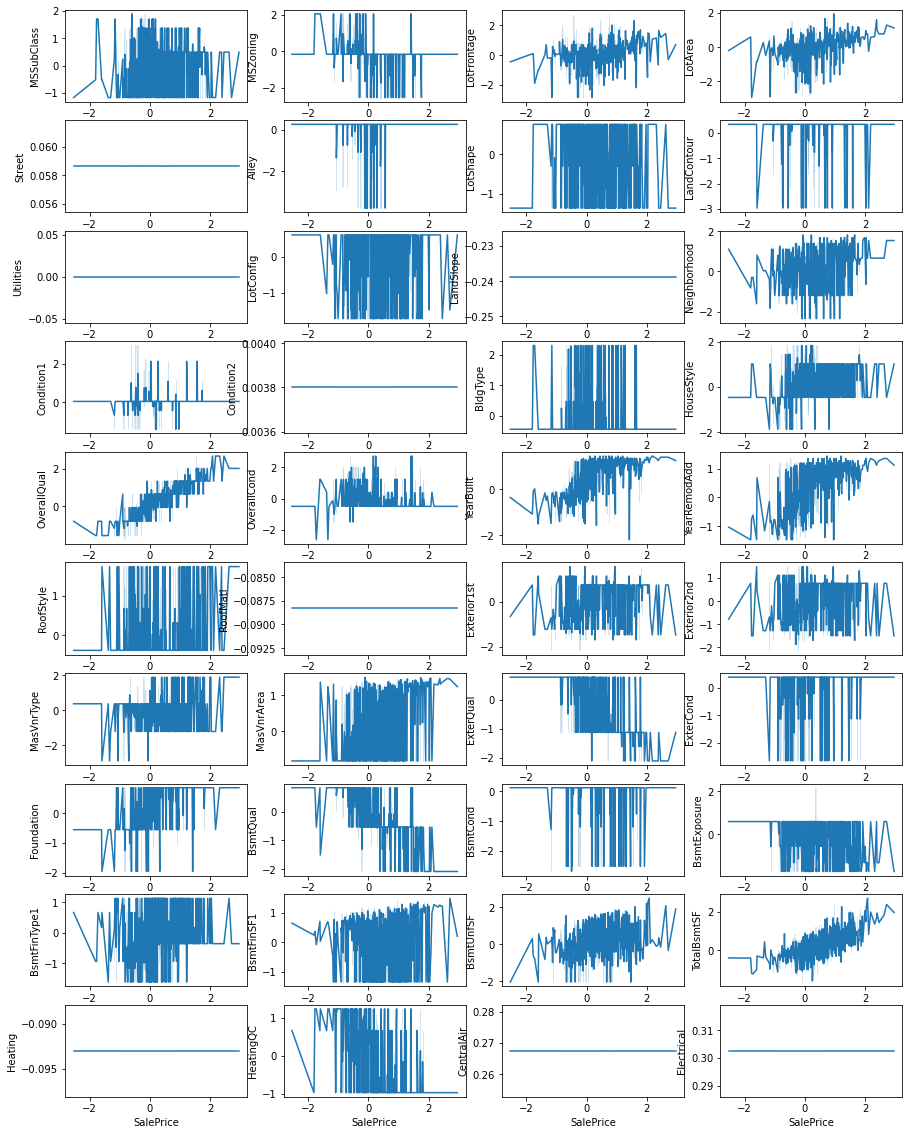

In [52]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [53]:
# Lets select the proper random state to build best model by using LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.9387294502007303
at random sate 0, the testing accuracy is:- 0.877578182379815


at random sate 1, the training accuracy is:- 0.9345375103267985
at random sate 1, the testing accuracy is:- 0.8939820323932441


at random sate 2, the training accuracy is:- 0.9272832534337077
at random sate 2, the testing accuracy is:- 0.9070846603437819


at random sate 3, the training accuracy is:- 0.9314728775049702
at random sate 3, the testing accuracy is:- 0.9039295238348193


at random sate 4, the training accuracy is:- 0.9170342624229945
at random sate 4, the testing accuracy is:- 0.9275360251862619


at random sate 5, the training accuracy is:- 0.9318724307646409
at random sate 5, the testing accuracy is:- 0.8969479722676189


at random sate 6, the training accuracy is:- 0.938473647821044
at random sate 6, the testing accuracy is:- 0.8769773282885202


at random sate 7, the training accuracy is:- 0.9333468620571933
at random sate 7, the testing accur

at random sate 80, the training accuracy is:- 0.9352607035056147
at random sate 80, the testing accuracy is:- 0.8827751854248506


at random sate 81, the training accuracy is:- 0.9281639481241863
at random sate 81, the testing accuracy is:- 0.9060640902090368


at random sate 82, the training accuracy is:- 0.9241135331467741
at random sate 82, the testing accuracy is:- 0.915809032890214


at random sate 83, the training accuracy is:- 0.9300614097221085
at random sate 83, the testing accuracy is:- 0.8912798987076715


at random sate 84, the training accuracy is:- 0.926258971993738
at random sate 84, the testing accuracy is:- 0.9082429250759404


at random sate 85, the training accuracy is:- 0.9337074968625971
at random sate 85, the testing accuracy is:- 0.8890080579541629


at random sate 86, the training accuracy is:- 0.9430793877221414
at random sate 86, the testing accuracy is:- 0.877276053480603


at random sate 87, the training accuracy is:- 0.9381042166921654
at random sate 87, th

at 66,90 random state the score is almost similar so i am selecting the 90 random state to build the best models

In [54]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=90)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(433, 79)
(433,)
(186, 79)
(186,)


# Lets Build the model for pridiction of sales price

In [56]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [57]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [58]:
# Model no.1
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)
model_accuracy(lr)

Train Report: 0.9226909152548473
Test Report: 0.9230661936613852
RMSE: 0.21428065232226814
MAE: 0.1657180888227168
MSE: 0.04591619795965676
Accuracy: 88.11 %
Standard Deviation: 2.77 %


In [59]:
# Model no.1
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=10000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy(Lasso_reg)

0.0006543802730975411
Train Report: 0.9225203825730585
Test Report: 0.9254306602992639
RMSE: 0.2109621284909119
MAE: 0.16331319585041582
MSE: 0.044505019657416024
Accuracy: 88.43 %
Standard Deviation: 2.92 %


In [60]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.9785985798944824
Test Report: 0.9100137362479049
RMSE: 0.23174611371685758
MAE: 0.17086695641178146
MSE: 0.05370626122286669
Accuracy: 84.15 %
Standard Deviation: 3.10 %


In [61]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.999998658966097
Test Report: 0.8880561003818149
RMSE: 0.2584785838992177
MAE: 0.19261317904819664
MSE: 0.0668111783345449
Accuracy: 82.88 %
Standard Deviation: 2.24 %


In [84]:
#Model no.4
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt=HistGradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.9872448578576577
Test Report: 0.9101307220741985
RMSE: 0.2315954250085992
MAE: 0.17348293728401726
MSE: 0.05363644088491369
Accuracy: 85.69 %
Standard Deviation: 3.46 %


In [63]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.7091501155546455
RMSE: 0.41663792310072184
MAE: 0.3020880684728421
MSE: 0.173587158965683
Accuracy: 63.87 %
Standard Deviation: 7.28 %


# Looking at accuracy i m selecting Lasso regression with Kfold cross validation method

In [64]:
#save model
import pickle
Filename='Finalized_model_Sales_price.pickle'
pickle.dump(Lasso_reg,open(Filename,'wb'))

# Lets Predict the sales price for the test data by selected model

In [140]:
data1=pd.read_csv('test.csv')  # read the data
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [141]:
# check the no. of rows & column & finding the count of missing value
print(data1.shape)
print("-"*60)
print(data1.isna().sum())
print("-"*60)
#printing the summary of data type
print(data1.info())

#first remove duplicates & recheck the size
data1.drop_duplicates(inplace=True)

# Lest drop the irrelavent columns first 
data1=data1.drop(columns='Id', axis=1)

print(data1.shape)
print("-"*60)
# Lets understand data at high level check the stastics of dataset
print(data1.describe(include='all'))
print("-"*60)

# As per the information in data description file the NA in the column Alley is No Alley Access so lets replace all NA with No alley access
data1['Alley']=data1['Alley'].replace("NA","No alley access")
data1[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=data1[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].replace("NA","No Basement")
data1['FireplaceQu']=data1['FireplaceQu'].replace("NA","No Fireplace")
data1['PoolQC']=data1['PoolQC'].replace("NA","No Pool")
data1['Fence']=data1['Fence'].replace("NA","No Fence")
data1[['GarageCond','GarageQual','GarageFinish','GarageType']]=data1[['GarageCond','GarageQual','GarageFinish','GarageType']].replace("NA","No Garage")

# As we see in POOlQC column null values are present so lets fill with zeros
data1['PoolQC']=data1['PoolQC'].fillna(0)

# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data1.columns.values.tolist()
for i in features:
    if data1[i].dtype in numerics:
        continue
    cat_col.append(i)

    
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    df=label.fit_transform(data1[i])
    pd.Series(df)
    data1[i]=df
    
    
    
# Creating null value list which we want to impute by using iterative inputer
df=data1[['LotFrontage','MasVnrArea','GarageYrBlt','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolArea','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
for i in df:
    df1=imputer.fit_transform(data1[[i]])
    pd.Series([df1])
    data1[i]=df1

    
    
# Still null values are present so lets deal with it by using mean method
data1['LotFrontage']=data1['LotFrontage'].fillna(data1['LotFrontage'].mean())

# See again Statistical Summary
# Lets understand data at high level check the stastics of dataset
data1.describe(include='all')



(292, 80)
------------------------------------------------------------
Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.0,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,57.414384,2.136986,66.425101,10645.143836,0.993151,1.921233,1.958904,2.791096,0.003425,3.078767,...,15.099315,0.0,0.0,3.623288,1.962329,28.184932,6.232877,2007.859589,4.828767,1.914384
std,43.780649,0.478114,19.975962,13330.669795,0.082618,0.366971,1.398953,0.699182,0.058521,1.541174,...,58.483473,0.0,0.0,0.949881,0.207965,224.036218,2.774556,1.322867,0.744829,0.576932
min,20.000000,0.000000,21.000000,1526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,20.000000,2.000000,57.750000,7200.000000,1.000000,2.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.0,0.0,4.000000,2.000000,0.000000,4.000000,2007.000000,5.000000,2.000000
50%,50.000000,2.000000,66.425101,9200.000000,1.000000,2.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.0,0.0,4.000000,2.000000,0.000000,6.000000,2008.000000,5.000000,2.000000
75%,70.000000,2.000000,76.000000,11658.750000,1.000000,2.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.0,0.0,4.000000,2.000000,0.000000,8.000000,2009.000000,5.000000,2.000000
max,190.000000,3.000000,150.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,396.000000,0.0,0.0,4.000000,2.000000,3500.000000,12.000000,2010.000000,5.000000,3.000000


In [142]:
data1.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

Null values treated well lets move further for the skewness.

In [143]:
data1.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 79, dtype: float64

As we see the skewness is present in the columns lets remove by using power transformation

In [144]:
# Separate the skewed columns
df1=['MSSubClass','LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'SaleType', 'SaleCondition']

# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data1[df1]=pt.fit_transform(data1[df1].values)

Now we handaled skewed data lets check the colinarity between label and predictors

In [145]:
data1.shape

(292, 79)

# Lets Do the prediction by using selected saved model 

In [146]:
data1["predictions"] = data1.apply(lambda s: Lasso_reg.predict(s.values[None])[0], axis=1)

In [147]:
data1["predictions"]

0      3.206583
1      1.407278
2      1.752104
3      1.295778
4      2.161446
         ...   
287    2.223310
288   -0.029469
289    0.615764
290    0.316112
291   -1.758343
Name: predictions, Length: 292, dtype: float64